## 1 Obtendo os dados

In [1]:
#Biblioteca para carga dos dados
import pandas as pd

In [2]:
#Definção dos títulos das colunas
headers = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC',
           'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

#Carga do conjunto de treino e validação
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtrain.txt'
data = pd.read_csv(arquivo, sep='\t', header=None, names=headers)

#Carga do conjunto de teste
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtest.txt'
data_test = pd.read_csv(arquivo, sep='\t', header=None, names=headers)

In [3]:
data.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1
3,0,0,3000,0,552,12,76,1,31,60,0,1
4,1,0,1000,0,809,12,111,0,24,7,0,1


In [4]:
#Biblioteca para transformação dos dados em matrizes
import numpy as np

In [5]:
#Transoformação dos atributos e da classe alvo em matrizes
X_train_ = np.array(data.iloc[:, 0:11])
y_train_ = np.array(data['CLASSE'])

#Transformação dos atributos e da classe alvo em matrizes
X_test = np.array(data_test.iloc[:, 0:11])
y_test = np.array(data_test['CLASSE'])

In [6]:
X_train_

array([[   1,    0,  360, ...,   25,   48,    0],
       [   0,    0,  350, ...,   33,    6,    0],
       [   0,    0, 1100, ...,   56,   48,    0],
       ...,
       [   0,    0,  570, ...,   28,  144,    0],
       [   0,    0,  360, ...,   33,   36,    0],
       [   0,    4,  501, ...,   37,    6,    0]])

In [7]:
#Função para fatiamento dos conjuntos de dados
from sklearn.model_selection import train_test_split

In [8]:
#Separação de treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_, #Conjuntos de dados
                                                  train_size=0.8,     #Tamanho da fatia de treinamento
                                                  random_state=31)

##2 Criando e treinando um modelo

In [9]:
#Importando o algoritmo que será usado como base
from sklearn.tree import DecisionTreeClassifier

In [10]:
#Criação do modelo
modelo = DecisionTreeClassifier(max_depth=3,
                                random_state=31)

In [11]:
#Conferência do moddelo
modelo

DecisionTreeClassifier(max_depth=3, random_state=31)

In [12]:
#Treinamento do modelo
modelo.fit(X_train,
           y_train)

DecisionTreeClassifier(max_depth=3, random_state=31)

In [13]:
#Visualização gráfica da árvore de decisão
import os
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(modelo,
                out_file='credit_tree.dot', #Arquivo para armazenamento do modelo gráfico
                feature_names=headers[0:11], #Nomes dos atributos
                rounded=True,
                filled=True
                )

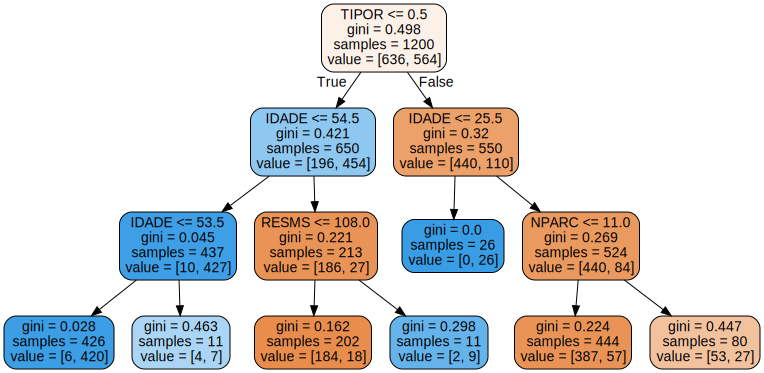

In [14]:
#Uso do arquivo gerado para visualizar a árvore
Source.from_file('credit_tree.dot')

##3 Aplicando o modelo treinado

In [15]:
#Revendo o conjunto de dados de validação
X_val[:5]

array([[   0,    0,  300,    1,  629,   12,   55,    1,   54,   60,  230],
       [   1,    0,  600,    1,  540,   12,   73,    0,   28,    6,    0],
       [   0,    0,  317,    1,  459,   12,   63,    1,   57,  264,    0],
       [   0,    0,  800,    0,  399,    3,  149,    1,   57,    0,    0],
       [   1,    0, 3000,    0,  360,    1,  376,    0,   43,   48,    0]])

In [16]:
#Predição no conjunto de validação
y_val_pred = modelo.predict(X_val)

In [17]:
#Visualização das primeiras 10 observações preditas
y_val_pred[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

##4 Avaliando o desempenho do modelo

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
#Matriz de confusão
confusion_matrix(y_val, y_val_pred)

array([[146,   3],
       [ 26, 125]])

In [20]:
#Organização dos dados para visualização da matriz
cm = confusion_matrix(y_val, y_val_pred)
tn, fp, fn, tp = cm.ravel()

#Reorganização da matriz confusão para
cm_reorganizada = np.array([[tp, fn], [fp, tn]])
cm_reorganizada

array([[125,  26],
       [  3, 146]])

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(1.3, 1.5, 'TN')

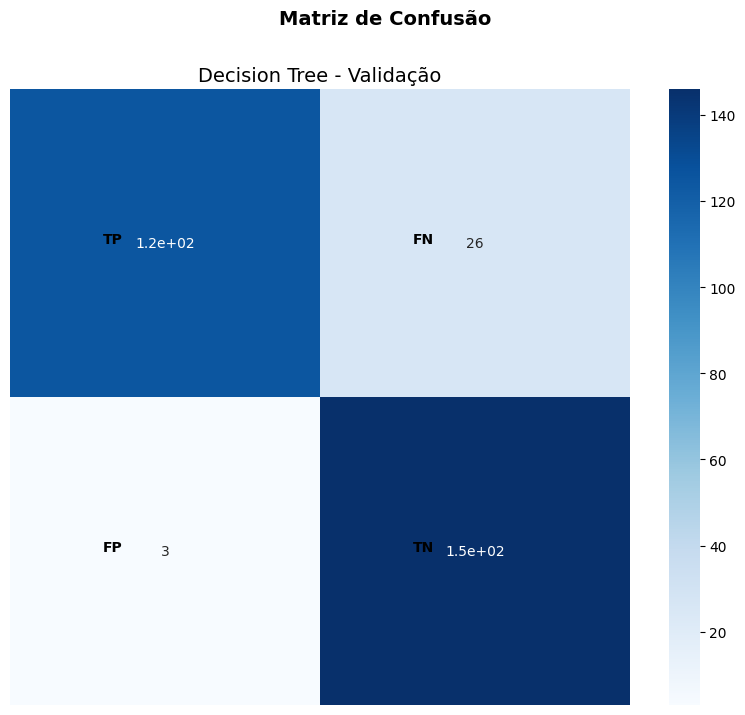

In [22]:
#Visualização Gráfica da Matriz de Confusão
modelo_title = 'Decision Tree - Validação'
fig = plt.figure(figsize=(10,8))
fig.suptitle('Matriz de Confusão', fontsize=14, fontweight='bold')

sns.heatmap(cm_reorganizada, cmap='Blues', annot=True)

plt.title(modelo_title, fontsize=14)

plt.xticks([])
plt.yticks([])

plt.annotate('TP', (0.3,0.5), fontweight='bold')
plt.annotate('FN', (1.3,0.5), fontweight='bold')
plt.annotate('FP', (0.3,1.5), fontweight='bold')
plt.annotate('TN', (1.3,1.5), fontweight='bold')

In [23]:
from sklearn.metrics import classification_report

In [24]:
#Visualizaçaõ do relatório de classificação
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       149
           1       0.98      0.83      0.90       151

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



## 5 Usando o modelo com dados novos

In [25]:
#Predição no conjunto de testes
y_pred = modelo.predict(X_test)

In [26]:
y_pred[:5]

array([0, 1, 1, 1, 0])

In [27]:
#Organização dos dados para visualização da matriz
cm = confusion_matrix(y_test, y_pred)

#Reorganização da matriz confusão para
tn, fp, fn, tp = cm.ravel()
cm_reorganizada = np.array([[tp, fn], [fp, tn]])

In [28]:
cm_reorganizada

array([[219,  52],
       [  4, 302]])

In [29]:
#Dimensão dos conjuntos de dados
print(X_train.shape,
      X_val.shape,
      X_test.shape,
      sep='\n')

(1200, 11)
(300, 11)
(577, 11)


Text(1.3, 1.5, 'TN')

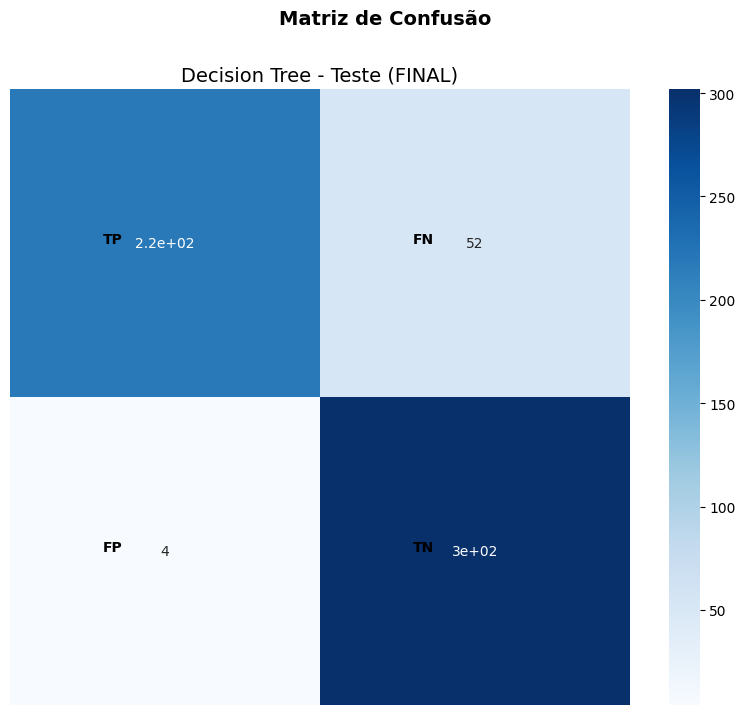

In [30]:
#Visualização Gráfica da Matriz de Confusão
modelo_title = 'Decision Tree - Teste (FINAL)'
fig = plt.figure(figsize=(10,8))
fig.suptitle('Matriz de Confusão', fontsize=14, fontweight='bold')

sns.heatmap(cm_reorganizada, cmap='Blues', annot=True)

plt.title(modelo_title, fontsize=14)

plt.xticks([])
plt.yticks([])

plt.annotate('TP', (0.3,0.5), fontweight='bold')
plt.annotate('FN', (1.3,0.5), fontweight='bold')
plt.annotate('FP', (0.3,1.5), fontweight='bold')
plt.annotate('TN', (1.3,1.5), fontweight='bold')

In [31]:
#Visualização do relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       306
           1       0.98      0.81      0.89       271

    accuracy                           0.90       577
   macro avg       0.92      0.90      0.90       577
weighted avg       0.91      0.90      0.90       577

